Patrick Gray (patrick.c.gray at duke) - https://github.com/patrickcgray

Chapter 9: Diving in Parallelization with Dask and Xarray
===============================================================



Many times a dataset will simply be too large to fit into memory or it may be considerably faster to run it on multiple processors. Python has often struggled with parallelization and may times tasks aren't well suited for it. But many scientific computing tasks, especially those dealing with larger rasters and massive netcdf, are quite conducive to parallel computing. Some such as raster algebra might even be called [embarasslingly parallel](https://en.wikipedia.org/wiki/Embarrassingly_parallel). This is where `dask` comes in. "Dask is a flexible library for parallel computing in Python." And most importantly for us it was designed specifically with N-Dimensional arrays and integrates seamlessly with `numpy` and `xarray`.

<img src="../data/dask-overview.svg" alt="drawing" width="550"/>


First let's pull in our normal assortment of python packages

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
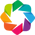

In [1]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
# numpy 
import numpy as np
import dask
# xarray (very handy)
import xarray as xr
import rasterio
# http://geo.holoviews.org/index.html
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import hvplot
import hvplot.pandas
import hvplot.xarray

import warnings
import sys
gv.extension('bokeh')

First let's see how many CPUs are available

In [2]:
import multiprocessing

multiprocessing.cpu_count()

2

And we'll check out our available memory

In [3]:
from psutil import virtual_memory

mem = virtual_memory()
print("Total memory in MB:", mem.total / (1024 * 1024)) # divide by 1024*1024 to get MB
print("Current memory available in MB:", mem.available / (1024 * 1024))

Total memory in MB: 6965.65234375
Current memory available in MB: 5753.18359375


Now let's start up a Dask Client!

In [4]:
from dask.distributed import Client

client = Client(processes=False)
client

<Client: 'inproc://172.17.0.2/591/1' processes=1 threads=2, memory=6.80 GiB>

It will be informative for you to monitor the `dask` dashboard while we're running some of these processes, the address you'll need do use because we're on docker is http://127.0.0.1:8787

For now we'll just use the default Client settings but check out this https://stackoverflow.com/questions/51099685/best-practices-in-setting-number-of-dask-workers and this https://docs.dask.org/en/latest/best-practices.html for some pointers on best practices and most efficiently setting up your system for parallel computing.

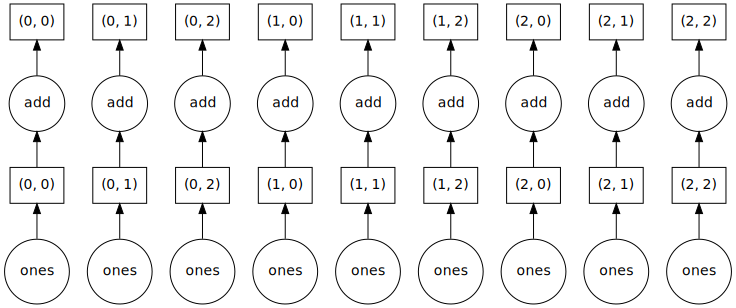

In [5]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))

y = x + x

y.visualize(filename='dask_add.svg')

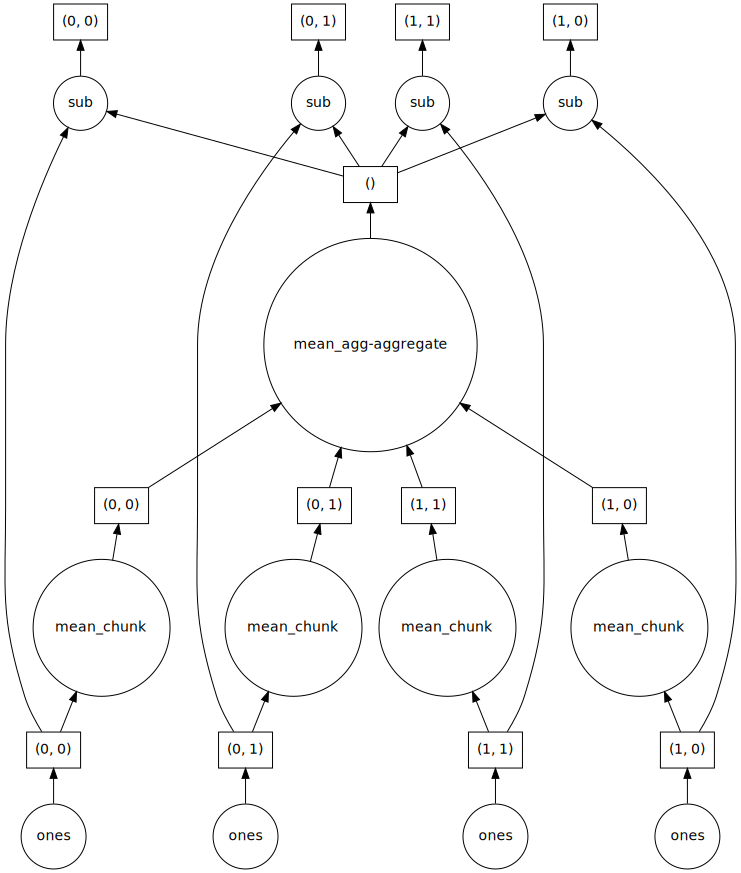

In [6]:
w = da.ones((16, 16), chunks=(8, 8))

z = w - w.mean()

z.visualize(filename='dask_add.svg')

Effectively what you're doing is creating a task graph that is then executed by Dask when you make a call the requires the data to be computed.

### Bringing back in our Ocean Color data

Now let's move back to our medium sized chla dataset from Chapter 8. 

We're going to run the SpectralClustering algorithm on our precipitation data to try to find any natural groupings. Remember clustering is a fundamental machine learning algorithm for assigning unlabeled data to a group. Read more about clustering here: https://scikit-learn.org/stable/modules/clustering.html

The `open_mfdataset` by default uses Dask arrays on the back end. This will lazily load it and keep it on disk (in the cloud in our case) until needed for computation.

In [7]:
chla_ds = xr.open_mfdataset(['https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v5.0-5DAY?lat[1000:1:1550],lon[2350:1:2750],time[1550:1:1650],chlor_a[1550:1:1650][1000:1:1550][2350:1:2750]'],parallel=True)
chla_ds

<xarray.Dataset>
Dimensions:  (lat: 551, lon: 401, time: 101)
Coordinates:
  * lat      (lat) float64 48.31 48.27 48.23 48.19 ... 25.52 25.48 25.44 25.4
  * lon      (lon) float64 -82.06 -82.02 -81.98 -81.94 ... -65.48 -65.44 -65.4
  * time     (time) datetime64[ns] 2018-11-07 2018-11-12 ... 2020-03-21
Data variables:
    chlor_a  (time, lat, lon) float32 dask.array<chunksize=(101, 551, 401), meta=np.ndarray>
Attributes: (12/50)
    _NCProperties:                     version=1|netcdflibversion=4.4.1.1|hdf...
    Conventions:                       CF-1.7
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    creator_email:                     help@esa-oceancolour-cci.org
    ...                                ...
    time_coverage_resolution:          P5D
    time_coverage_duration:            P5D
    start_date:                        26-DEC-2020 00:00:00.000000
    stop_date:                         30-DEC-2020 23:59:00.000000
    time_coverage_start:               202012260000Z
    time_coverage_end:                 202012302359Z

In [8]:
chla_ds.chlor_a

<xarray.DataArray 'chlor_a' (time: 101, lat: 551, lon: 401)>
dask.array<open_dataset-b803f7d5139f45e59dfaa2d641796fcachlor_a, shape=(101, 551, 401), dtype=float32, chunksize=(101, 551, 401), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 48.31 48.27 48.23 48.19 ... 25.52 25.48 25.44 25.4
  * lon      (lon) float64 -82.06 -82.02 -81.98 -81.94 ... -65.48 -65.44 -65.4
  * time     (time) datetime64[ns] 2018-11-07 2018-11-12 ... 2020-03-21
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

Now first we'll change the chunking of our dataset. From the [Dask documentation](https://docs.dask.org/en/latest/array-chunks.html):

>Dask arrays are composed of many NumPy arrays. How these arrays are arranged can significantly affect performance. For example, for a square array you might arrange your chunks along rows, along columns, or in a more square-like fashion. Different arrangements of NumPy arrays will be faster or slower for different algorithms.
>
>Thinking about and controlling chunking is important to optimize advanced algorithms.

`da.chunk()` coerces all arrays in this dataset into dask arrays with the given chunks. Remember from before we could also load it all into memory with `da.load()` if the da isn't too big but the whole point here is to permit operations in massive datasets. With that said as noted in the [Dask best practices](https://docs.dask.org/en/latest/array-best-practices.html) if you data does fit into memory, it can be **WAY** faster to just use numpy arrays instead of dask.

In [9]:
chla_ds = chla_ds.chunk({"time":110, "lat":-1, "lon":-1})
chla_ds.chunks

Frozen(SortedKeysDict({'time': (101,), 'lat': (551,), 'lon': (401,)}))

In [10]:
chla_ds.chlor_a

<xarray.DataArray 'chlor_a' (time: 101, lat: 551, lon: 401)>
dask.array<open_dataset-b803f7d5139f45e59dfaa2d641796fcachlor_a, shape=(101, 551, 401), dtype=float32, chunksize=(101, 551, 401), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 48.31 48.27 48.23 48.19 ... 25.52 25.48 25.44 25.4
  * lon      (lon) float64 -82.06 -82.02 -81.98 -81.94 ... -65.48 -65.44 -65.4
  * time     (time) datetime64[ns] 2018-11-07 2018-11-12 ... 2020-03-21
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

**Note**: If you don't have a particularly powerful computer you may want to subset your data into the subset below by running the two following blocks and uncommenting the line `rainfall_stacked = subset_imerg_xds.HQprecipitation.stack(z=('lat', 'lon'))`.

In [11]:
overall_bbox = np.array([
    [-74.13671875,-15.3724475816178],
    [-60.984375,-15.372447581617823],
    [-60.984375,-10.685765151760275],
    [-74.13671875,-10.6857651517602]])
max_lon_lat = np.max(overall_bbox, axis=0)
min_lon_lat = np.min(overall_bbox, axis=0)

gv.tile_sources.EsriImagery.options(width=350) * gv.Polygons(overall_bbox).options(alpha=0.25)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [12]:
subset_imerg_xds = imerg_xds.sel(lon=slice(min_lon_lat[0], max_lon_lat[0]), lat=slice(min_lon_lat[1], max_lon_lat[1]))  
subset_imerg_xds.dims

NameError: name 'imerg_xds' is not defined

And now we'll stack the data so we have the time dimension and a single flattened array of all the individual (lat,lon) pairs. Effectively turning it into the shape (time, location) rather than (time, lat, lon). This `stack()` function is similar to `np.flatten()`.

Also note that we're doing it on the DataArray (chlor_a) not on the whole DataSet.

In [29]:
chla_ds_interp = chla_ds.chlor_a.interpolate_na(dim="time", method="linear", limit=None, max_gap=None)

In [ ]:
chla_ds_interp[0].plot()

In [30]:
chla_ds_interp[1].plot()

distributed.worker - ERROR - ('error', 'waiting')
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/distributed/worker.py", line 1503, in add_task
    self.transition(ts, "waiting", runspec=runspec)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/distributed/worker.py", line 1603, in transition
    func = self._transitions[start, finish]
KeyError: ('error', 'waiting')
distributed.core - ERROR - ('error', 'waiting')
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/distributed/core.py", line 573, in handle_stream
    handler(**merge(extra, msg))
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/distributed/worker.py", line 1503, in add_task
    self.transition(ts, "waiting", runspec=runspec)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/distributed/worker.py", line 1603, in transition
    func = self._transitions[start, finish]
KeyError: ('error', 'waiting')

KeyboardInterrupt: 

In [13]:
chla_stacked = chla_ds.chlor_a.stack(z=('lat', 'lon'))
chla_stacked

<xarray.DataArray 'chlor_a' (time: 101, z: 220951)>
dask.array<reshape, shape=(101, 220951), dtype=float32, chunksize=(101, 220951), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2018-11-07 2018-11-12 ... 2020-03-21
  * z        (z) MultiIndex
  - lat      (z) float64 48.31 48.31 48.31 48.31 48.31 ... 25.4 25.4 25.4 25.4
  - lon      (z) float64 -82.06 -82.02 -81.98 -81.94 ... -65.48 -65.44 -65.4
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

And notice that the location length here is equal to the lat x lon from the previous dimensions.

Now because the shape needs to be `(n_samples, n_features)` for the clustering algorithm we'll transpose the array to make it (location, time)

In [14]:
chla_stacked_T = chla_stacked.transpose().compute()
chla_stacked_T

<xarray.DataArray 'chlor_a' (z: 220951, time: 101)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.04125881, 0.03929066, 0.04097646, ..., 0.04117101, 0.04169051,
        0.03584005],
       [0.04419047, 0.03709409, 0.03903751, ..., 0.04366544, 0.04327095,
        0.03755612],
       [0.04789155, 0.03392489, 0.04063994, ..., 0.04793065, 0.04424963,
        0.03632508]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-07 2018-11-12 ... 2020-03-21
  * z        (z) MultiIndex
  - lat      (z) float64 48.31 48.31 48.31 48.31 48.31 ... 25.4 25.4 25.4 25.4
  - lon      (z) float64 -82.06 -82.02 -81.98 -81.94 ... -65.48 -65.44 -65.4
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

In [15]:
chla_stacked_T.persist()

<xarray.DataArray 'chlor_a' (z: 220951, time: 101)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.04125881, 0.03929066, 0.04097646, ..., 0.04117101, 0.04169051,
        0.03584005],
       [0.04419047, 0.03709409, 0.03903751, ..., 0.04366544, 0.04327095,
        0.03755612],
       [0.04789155, 0.03392489, 0.04063994, ..., 0.04793065, 0.04424963,
        0.03632508]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-07 2018-11-12 ... 2020-03-21
  * z        (z) MultiIndex
  - lat      (z) float64 48.31 48.31 48.31 48.31 48.31 ... 25.4 25.4 25.4 25.4
  - lon      (z) float64 -82.06 -82.02 -81.98 -81.94 ... -65.48 -65.44 -65.4
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

Now that we have all of our data ready let's build our classifiers. The dask-ml packages is basically identical to scikit-learn that we used previously so they're shouldn't be too much of a learning curve, just faster processing!

In [16]:
import sklearn.cluster
import dask_ml.cluster

dask_spectralcluster_clf = dask_ml.cluster.SpectralClustering(n_clusters=8, random_state=0, gamma=None,
                             kmeans_params={'init_max_iter': 5},
                             persist_embedding=True, n_jobs=-1)
dask_kmeans_clf = dask_ml.cluster.KMeans(n_clusters=10)

scikit_kmeans_clf = sklearn.cluster.KMeans(n_clusters=10)
scikit_spectralcluster_clf = sklearn.cluster.SpectralClustering(n_clusters=10, gamma=None)

Spectral clustering takes around 30 seconds and KMeans takes a little over a minute on my machine with 32 GB of RAM and 16 cores.

In [21]:
chla_stacked_T.interpolate_na(dim="time", method="linear")

<xarray.DataArray 'chlor_a' (z: 220951, time: 101)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.04125881, 0.03929066, 0.04097646, ..., 0.04117101, 0.04169051,
        0.03584005],
       [0.04419047, 0.03709409, 0.03903751, ..., 0.04366544, 0.04327095,
        0.03755612],
       [0.04789155, 0.03392489, 0.04063994, ..., 0.04793065, 0.04424963,
        0.03632508]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-07 2018-11-12 ... 2020-03-21
  * z        (z) MultiIndex
  - lat      (z) float64 48.31 48.31 48.31 48.31 48.31 ... 25.4 25.4 25.4 25.4
  - lon      (z) float64 -82.06 -82.02 -81.98 -81.94 ... -65.48 -65.44 -65.4
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

In [17]:
%time dask_spectralcluster_clf.fit(chla_stacked_T)
#%time dask_kmeans_clf.fit(rainfall_stacked_T)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

This may take a substantial amount of time, it takes 2 minutes and 16 seconds for KMeans on my machine and while Spectral Clustering may work if you have a particularly powerful computer, but on most computers you won't actually be able to load this all in to memory to do this with the traditional `scikit-learn` library.

In [19]:
%time scikit_spectralcluster_clf.fit(chla_stacked_T)
#%time scikit_kmeans_clf.fit(rainfall_stacked_T)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**In summary there are some clear advantages to using parallel processing**, in this case of 2x speedups and operations that aren't feasible with typical in-memory constraints.

To further drive this point home and show how this improvement grows even more as your datasets frow here is a great example from the `dask-ml` documentation, though **I recommend you run it in the cloud if you don't want it to take 5-10 minutes of your computer's time**: https://colab.research.google.com/github/patrickcgray/open-geo-tutorial/blob/master/dask_demo.ipynb

Example adapted from https://dask-ml-benchmarks.readthedocs.io/en/latest/auto_examples/plot_spectral_clustering.html.

In [ ]:
from sklearn.datasets import make_circles
from sklearn.utils import shuffle
import pandas as pd

from timeit import default_timer as tic
import sklearn.cluster
import dask_ml.cluster
import seaborn as sns

Ns = [2500, 5000, 7500, 10000, 12500, 15000]
X, y = make_circles(n_samples=10_000, noise=0.05, random_state=0, factor=0.5)
X, y = shuffle(X, y)

timings = []
for n in Ns:
    X, y = make_circles(n_samples=n, random_state=n, noise=0.5, factor=0.5)
    t1 = tic()
    sklearn.cluster.SpectralClustering(n_clusters=2).fit(X)
    timings.append(('Scikit-Learn (exact)', n, tic() - t1))
    t1 = tic()
    dask_ml.cluster.SpectralClustering(n_clusters=2, n_components=100).fit(X)
    timings.append(('dask-ml (approximate)', n, tic() - t1))


df = pd.DataFrame(timings, columns=['method', 'Number of Samples', 'Fit Time'])
sns.catplot(x='Number of Samples', y='Fit Time', hue='method',
               data=df, aspect=1.5)

Let's finish this classification example using the hvplot visualization tools we've now learned.

In [ ]:
# get labels for Spectral Clustering
labels = dask_spectralcluster_clf.assign_labels_.labels_.compute()
# get labels for KMeans Clustering
#labels = dask_kmeans_clf.labels_.compute()
labels.shape

Now let's convert the labels back to an xarray dataset with the same spatial information as our previous array.

In [ ]:
# use the chlarainfall_stacked_T array as a template
template = chla_stacked_T[:, 0]
# overwrite the copy of chla_stacked_T's data with the labels 
labels_array = template.copy(data=labels)

# the array remembers the stack operation so it is as simple as unstack! 
unstacked = labels_array.unstack()
unstacked

And now let's visualize some clusters around the Amazon and surrounding areas. If you run both KMeans and Spectral you'll notice they're substantially different final clusters.

In [ ]:
import cartopy.crs as crs
import geoviews.feature as gf

gf.ocean * \
gf.land * \
unstacked.hvplot(x="lon", y="lat", width=500, height=300, cmap='Category10',projection=crs.Orthographic(-90, 30),
    global_extent=True, clim=(0,8)) * \
gf.coastline * \
gf.borders

In [46]:
gf.ocean * \
gf.land * \
imerg_xds.HQprecipitation.mean("time").hvplot(x="lon", y="lat", width=500, height=300, cmap='jet',projection=ccs.Orthographic(-90, 30),
    global_extent=True, clim=(0,3)) * \
gf.coastline * \
gf.borders

:Overlay
   .Ocean.I     :Feature   [Longitude,Latitude]
   .Land.I      :Feature   [Longitude,Latitude]
   .Image.I     :Image   [lon,lat]   (HQprecipitation)
   .Coastline.I :Feature   [Longitude,Latitude]
   .Borders.I   :Feature   [Longitude,Latitude]

While it is challenging to decipher the specific meanings of some of these clusters without further analysis we can notice it cluster some of the higher precipitation areas and even areas with major spikes of precipitation like along along eastern edge of the Andes.

# That's all folks!

#### What's next?

Now that you've gotten a taste of using python for GIS, remote sensing, and general scientific computing we recommend keeping up with the top journals, playing with other labs like this one, and explore the whole python geospatial community. Some examples:
- follow some top research journals such as [Remote Sensing of Environment](https://www.journals.elsevier.com/remote-sensing-of-environment), [IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing](https://ieeexplore.ieee.org/xpl/RecentIssue.jsp?punumber=4609443), and [ISPRS Journal of Photogrammetry and Remote Sensing](https://www.journals.elsevier.com/isprs-journal-of-photogrammetry-and-remote-sensing)
- explore other good notebooks and tutorials like: 
  - https://earthml.pyviz.org/index.html
  - http://earthpy.org/dask.html
  - https://rabernat.github.io/research_computing/
  - https://geohackweek.github.io/nDarrays/
- play with all the amazing datasets out there (e.g. Earth on AWS https://aws.amazon.com/earth/)
- self-teach all the other cool open source python geospatial tools: https://github.com/sacridini/Awesome-Geospatial#python 